In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

# We have just worked on the EDA of data from the India Table

In [5]:
df_IN= pd.read_csv("INvideos.csv")

In [47]:
df_IN.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [48]:
df_IN.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [77]:
df_IN.shape

(37352, 17)

#### Working on mapping the category_id with the respective category_type given in the JSON File

In [34]:
yt_dir = r"C:\Users\Gourav Kumar\Downloads\archive"
with open(os.path.join(yt_dir, "IN_category_id.json")) as file:
    map_classes = json.loads(file.read())

In [35]:
map_classes['items']

[{'kind': 'youtube#videoCategory',
  'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
  'id': '1',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Film & Animation',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
  'id': '2',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Autos & Vehicles',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
  'id': '10',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Music',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/HwXKamM1Q20q9BN-oBJavSGkfDI"',
  'id': '15',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Pets & Animals',
   'assignable': True}},
 {'kind': 'youtube#videoCategory',
  'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/9GQMSRjrZdHe

In [28]:
len(map_classes["items"])

31

In [39]:
int(map_classes['items'][0]['id'])

1

In [41]:
map_id=[]
map_title=[]

for i in range(len(map_classes["items"])):
    map_id.append(int(map_classes['items'][i]['id']))
    map_title.append(map_classes['items'][i]['snippet']['title'])

In [44]:
map_id

[1,
 2,
 10,
 15,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44]

In [45]:
map_dict= {map_id[i]:map_title[i] for i in range(len(map_classes["items"]))}

In [46]:
map_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [51]:
df_IN['category_type']= df_IN['category_id'].map(map_dict)

In [53]:
df_IN.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_type
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,Film & Animation
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",News & Politics
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,Entertainment
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,Comedy
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,Entertainment


#### Working on extracting the Hour of Publish from publish_time column

In [75]:
df_IN["publish_time"][0].split('T')[1][:2]

'12'

In [80]:
df_IN["publish_hour"]=1

for i in range(df_IN.shape[0]):
    df_IN["publish_hour"][i]=int(df_IN["publish_time"][i].split('T')[1][:2])

<ipython-input-80-9a64a0956739>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IN["publish_hour"][i]=int(df_IN["publish_time"][i].split('T')[1][:2])


In [81]:
df_IN.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_type,publish_hour
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,Film & Animation,12
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",News & Politics,5
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,Entertainment,15
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,Comedy,7
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,Entertainment,1


#### Looking at the top channels which have had of their videos trending

In [82]:
df_IN["channel_title"].value_counts().head(30)

VikatanTV               284
etvteluguindia          282
Flowers Comedy          270
ETV Plus India          253
SAB TV                  244
RadaanMedia             243
mallemalatv             238
SET India               238
ETV Jabardasth          234
Vijay Television        231
Tarang TV               223
T-Series                221
Mazhavil Manorama       220
Technical Guruji        215
Study IQ education      213
V6 News Telugu          212
zeetv                   198
Speed Records           197
SunTV Tamil             196
zeetvtelugu             193
Black Sheep             192
zeemarathi              191
Colors TV               186
Sony PAL                182
Saregama TVShows        182
FilterCopy              182
Aditya Music            180
T-Series Apna Punjab    179
5-Minute Crafts         173
TV9 Telugu              170
Name: channel_title, dtype: int64

#### Looking at the category of vidoes which trended the most

In [83]:
df_IN["category_type"].value_counts().head(30)

Entertainment           16712
News & Politics          5241
Music                    3858
Comedy                   3429
People & Blogs           2624
Film & Animation         1658
Education                1227
Howto & Style             845
Sports                    731
Science & Technology      552
Shows                     205
Autos & Vehicles           72
Gaming                     66
Movies                     16
Travel & Events             8
Pets & Animals              3
Name: category_type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='category_type'>

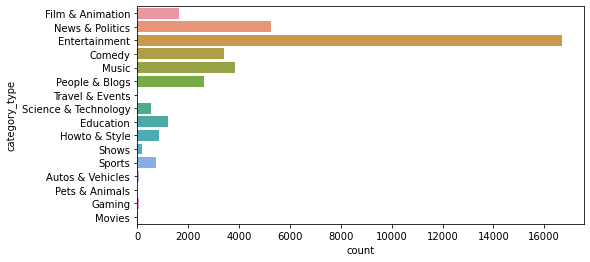

In [84]:
plt.figure(figsize=(8, 4))

sns.countplot(y=df_IN["category_type"])

#### Looking at the hour in which most of the trending videos had been published

In [87]:
df_IN["publish_hour"].value_counts()

14    2838
12    2782
13    2631
6     2323
11    2295
5     2184
16    2134
15    2130
7     2119
10    2058
8     2051
4     1960
9     1863
17    1587
3     1330
2      978
18     849
1      585
22     531
19     524
23     506
0      400
21     359
20     335
Name: publish_hour, dtype: int64

<AxesSubplot:xlabel='count', ylabel='publish_hour'>

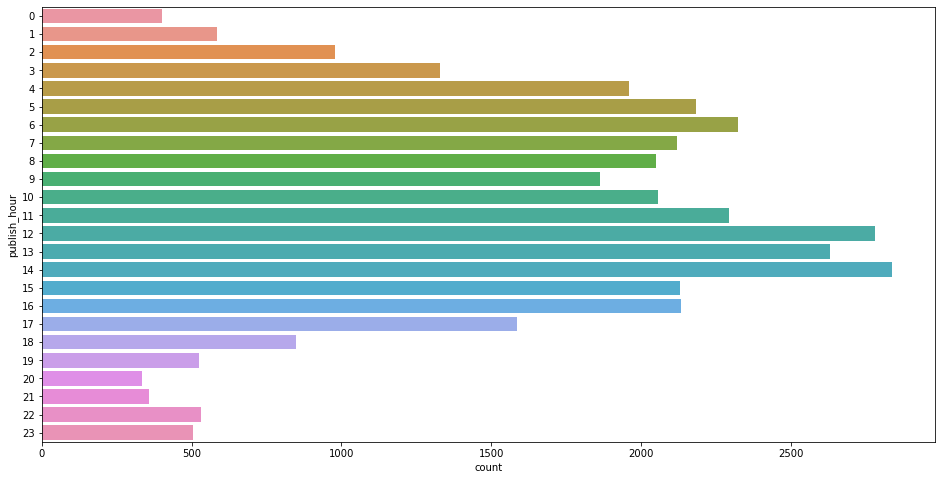

In [90]:
plt.figure(figsize=(16, 8))

sns.countplot(y=df_IN["publish_hour"])

In [85]:
df_IN.groupby('trending_date')

dict_keys(['17.01.12', '17.02.12', '17.03.12', '17.04.12', '17.05.12', '17.06.12', '17.07.12', '17.08.12', '17.09.12', '17.10.12', '17.11.12', '17.12.12', '17.13.12', '17.14.11', '17.14.12', '17.15.11', '17.15.12', '17.16.11', '17.16.12', '17.17.11', '17.17.12', '17.18.11', '17.18.12', '17.19.11', '17.19.12', '17.20.11', '17.20.12', '17.21.11', '17.21.12', '17.22.11', '17.22.12', '17.23.11', '17.23.12', '17.24.11', '17.24.12', '17.25.11', '17.25.12', '17.26.11', '17.26.12', '17.27.11', '17.27.12', '17.28.11', '17.28.12', '17.29.11', '17.29.12', '17.30.11', '17.30.12', '17.31.12', '18.01.01', '18.01.02', '18.01.03', '18.01.04', '18.01.05', '18.01.06', '18.02.01', '18.02.02', '18.02.03', '18.02.04', '18.02.05', '18.02.06', '18.03.01', '18.03.02', '18.03.03', '18.03.04', '18.03.05', '18.03.06', '18.04.01', '18.04.02', '18.04.03', '18.04.04', '18.04.05', '18.04.06', '18.05.01', '18.05.02', '18.05.03', '18.05.04', '18.05.05', '18.05.06', '18.06.01', '18.06.02', '18.06.03', '18.06.04', '18.0

#### Looking at the number of videos that had gone trending on each day

In [117]:
df_IN.groupby('trending_date').video_id.count()

trending_date
17.01.12    200
17.02.12    183
17.03.12    184
17.04.12    184
17.05.12    196
           ... 
18.30.04    184
18.30.05    182
18.31.01    187
18.31.03    195
18.31.05    183
Name: video_id, Length: 205, dtype: int64

<AxesSubplot:xlabel='trending_date'>

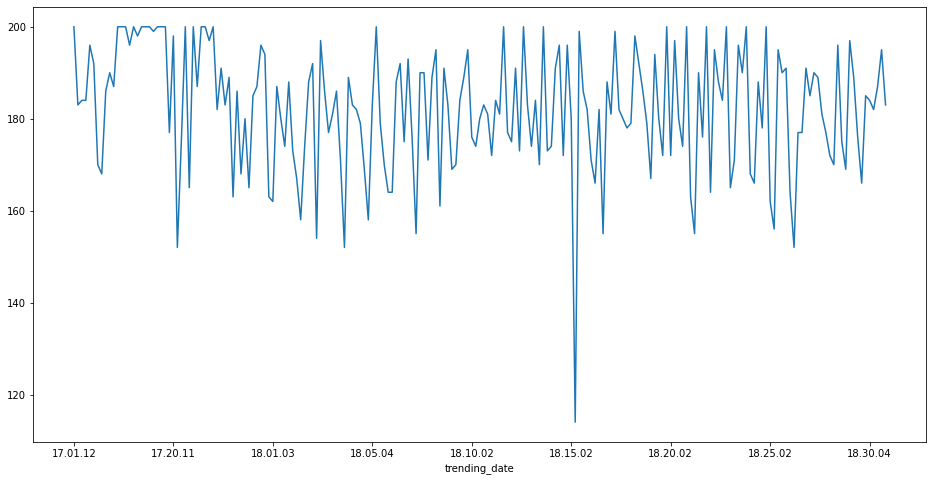

In [116]:
plt.figure(figsize=(16,8))

df_IN.groupby('trending_date').video_id.count().plot()

#### Looking at the correlation between the different columns of the dataframe

In [113]:
df_IN.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,publish_hour
category_id,1.000000,-0.183215,-0.127600,-0.042450,-0.036223,0.038928,0.057953,-0.053865,0.059440
views,-0.183215,1.000000,0.850096,0.543294,0.674195,-0.034227,-0.034364,0.004976,-0.008673
likes,-0.127600,0.850096,1.000000,0.494560,0.780514,-0.045624,-0.040741,0.028464,0.014808
dislikes,-0.042450,0.543294,0.494560,1.000000,0.708125,-0.011821,-0.015136,0.002985,0.012359
comment_count,-0.036223,0.674195,0.780514,0.708125,1.000000,-0.032860,-0.024210,0.015771,0.012162
comments_disabled,0.038928,-0.034227,-0.045624,-0.011821,-0.032860,1.000000,0.354718,-0.003132,-0.033311
ratings_disabled,0.057953,-0.034364,-0.040741,-0.015136,-0.024210,0.354718,1.000000,-0.002508,-0.038417
video_error_or_removed,-0.053865,0.004976,0.028464,0.002985,0.015771,-0.003132,-0.002508,1.000000,0.014432
publish_hour,0.059440,-0.008673,0.014808,0.012359,0.012162,-0.033311,-0.038417,0.014432,1.000000


In [112]:
df_IN["likes"].corr(df_IN["views"])

0.8500958228027328

In [118]:
!jupyter nbconvert --to html Buddy_Challenge.ipynb

[NbConvertApp] Converting notebook Buddy_Challenge.ipynb to html
[NbConvertApp] Writing 762929 bytes to Buddy_Challenge.html
